<a href="https://colab.research.google.com/github/AlinaZakharova1997/Tokenizator/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Topic_model_BigARTM_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашнее задание

Основаная задача - **построить хорошую тематическую модель с интерпретируемыми топиками с помощью BigARTM**.

1) сделайте нормализацию (если pymorphy2 работает долго используйте mystem или попробуйте установить быструю версию - `pip install pymorphy2[fast]`, можно использовать какой-то другой токенизатор) done

2) добавьте нграммы (в тетрадке есть закомменченая ячейка с Phrases, можно также попробовать другие способы построить нграммы); done

3) сохраните тексты .vw формате; done

4) сделайте хороший словарь (отфильтруйте слишком частотные и редкие слова, попробуйте удалить стоп-слова, сохраните словарь и посмотрите на него, вдруг что-то плохое сразу будет заметно - из словаря можно просто вручную или правилом удалять строки, при загрузке ничего не сломается); done

5) постройте несколько ARTM моделей (переберите количество тем, поменяйте значения tau у регуляризаторов), если получаются плохие темы, поработайте дополнительно над предобработкой и словарем; 

6) для самой хорошей модели в отдельной ячейке напечатайте 3 хороших (на ваш вкус) темы

7) в другой ячейке нарисуйте график обучения этой модели 

8) в третьей ячейки опишите какие параметры (количество тем, регуляризаторы, их tau) вы использовали и как обучали (например, после скольки проходов добавили регуляризатор разрежнивания тем (Phi), добавляли ли разреженность документам (Theta) и когда, как повышали значения, сколько итерации модель продожала улучшаться (снижалась перплексия, росли другие метрики);

Сохраните тетрадку с экспериментами и положите её на гитхаб, ссылку на неё укажите в форме.

**Оцениваться будут главным образом пункты 6, 7 и 8. (3, 1, 4 баллов соответственно). Чтобы заработать остальные 2 балла, нужно хотя бы немного изменить мой код на промежуточных этапах (добавить что-то, указать другие параметры и т.д). **

### Установка BigARTM
Все точно как в инструкции на их сайте, только без установки питона и пипа.

In [4]:
!apt-get --yes install git make cmake build-essential libboost-all-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
make is already the newest version (4.1-9.1ubuntu1).
make set to manually installed.
libboost-all-dev is already the newest version (1.65.1.0ubuntu1).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
git is already the newest version (1:2.17.1-1ubuntu0.7).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.


In [5]:
!pip install protobuf tqdm wheel

In [6]:
!git clone --branch=stable https://github.com/bigartm/bigartm.git

Cloning into 'bigartm'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 16618 (delta 6), reused 6 (delta 0), pack-reused 16591
Receiving objects: 100% (16618/16618), 17.21 MiB | 21.21 MiB/s, done.
Resolving deltas: 100% (11613/11613), done.


In [ ]:
cd bigartm

In [ ]:
mkdir build

In [ ]:
cd build

In [ ]:
!cmake ..

In [11]:
!make

Scanning dependencies of target libprotobuf
[  0%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/arena.cc.o
[  0%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/arenastring.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/extension_set.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/generated_message_util.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/coded_stream.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/zero_copy_stream.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/zero_copy_stream_impl_lite.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/

In [12]:
!pip install python/bigartm*.whl -U

Processing ./python/bigartm-0.10.0-cp36-cp36m-linux_x86_64.whl


Вернемся в изначальную папку.

In [13]:
cd ../.. 

/content


In [14]:
!pip install pymorphy2[fast] nltk gensim

     |████████████████████████████████| 61kB 3.0MB/s 
     |████████████████████████████████| 8.2MB 5.8MB/s 
     |████████████████████████████████| 378kB 42.9MB/s 
  Created wheel for DAWG: filename=DAWG-0.8.0-cp36-cp36m-linux_x86_64.whl size=855039 sha256=39ac57e2281a449a7a8d7f76a2771181459c9370246f8aee33caa6005d6d2d01
  Stored in directory: /root/.cache/pip/wheels/3d/1f/f0/a5b1f9d02e193c997d252c33d215f24dfd7a448bc0166b2a12
Successfully built DAWG


In [27]:
import artm
%matplotlib inline
import glob
import os, re
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from nltk.corpus import stopwords
import numpy as np
from pymorphy2 import MorphAnalyzer
import gensim, nltk
morph = MorphAnalyzer()
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.6/dist-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)


In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [57]:
stops = set(stopwords.words('russian'))
also_stops = ['свой', 'это','также','мочь','однако', 'иметь', 'быть', 'стать']

def remove_tags(text):
    return re.sub(r'<[^>]+>', '', text)

'''def clean(words):
    clean1 = [morph.parse(word)[0].normal_form for word in words if word]
    clean = []
    for w in clean1:
      if not re.search('[\'\"#\—\»i\«]+?',word) and not re.search('[a-zA-Z]+?',word) and not re.search('[0-9]+?',word):
        clean.append(w)
    return clean'''

def tokenize(text):
    words = [word.strip(string.punctuation) for word in text.split()]
    words = [word for word in words if word not in stops and word not in also_stops]
    words = [word for word in words if not re.search('[\'\"#\—\»i:\«]+?',word) and not re.search('[a-zA-Z]+?',word) and not re.search('[0-9]+?',word) and not word=='']
    
    return words

## Возьмем теже данные

In [19]:
!wget https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/habr_texts.txt.zip

--2021-01-26 15:24:31--  https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/habr_texts.txt.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/habr_texts.txt.zip [following]
--2021-01-26 15:24:31--  https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/habr_texts.txt.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18645068 (18M) [application/zip]
Saving to: ‘habr_texts.txt.zip’

habr_texts.txt.zip  100%[===================>]  17.78M  40.1MB/s    in 0.4s    

2021-01-26 15:24:32 (40.1 MB/s) - ‘habr_texts.t

In [18]:
!unzip habr_texts.txt.zip

unzip:  cannot find or open habr_texts.txt.zip, habr_texts.txt.zip.zip or habr_texts.txt.zip.ZIP.


In [52]:
habr_texts = [remove_tags(text) for text in open('habr_texts.txt')]

In [58]:
habr_texts = [tokenize(text.lower()) for text in open('habr_texts.txt')]

In [59]:
# вернемся сюда через какое-то время
ph = gensim.models.Phrases(habr_texts, scoring='npmi', threshold=0.3, common_terms=set(stopwords.words('russian'))) # можно указать слова, которые  не будут учитываться
p = gensim.models.phrases.Phraser(ph)
ngrammed_habr_texts = p[habr_texts]

In [60]:
p[habr_texts[1]]

['введение',
 'выбор',
 'решения',
 'рано_поздно',
 'наступает_момент',
 'жизни',
 'любого',
 'сообщества',
 'форума',
 'привлечения',
 'удержания',
 'людей',
 'возникает',
 'острая',
 'необходимость',
 'использования',
 'нового',
 'инструментария',
 'таким',
 'весьма',
 'эффективным_инструментом',
 'является',
 'кроется',
 'модным',
 'ныне',
 'словом',
 'геймификация',
 'использование',
 'характерных',
 'игр',
 'приемов',
 'подходов',
 'неигровых',
 'процессах',
 'привлечению',
 'вовлечению',
 'участников_сообщества',
 'форуме',
 'создание',
 'активного',
 'мощного',
 'информационного',
 'поля',
 'вокруг',
 'нашего_продукта',
 'используемый',
 'нашей_компании',
 'форумный',
 'движок',
 'настоящее_время',
 'является',
 'наиболее_популярным',
 'быстро',
 'развивающимся',
 'движок',
 'по-умолчанию',
 'имеет',
 'встроенную',
 'систему',
 'трофеев',
 'основанную',
 'собственной',
 'весьма',
 'ограниченной',
 'системе',
 'критериев',
 'сама',
 'система',
 'создания',
 'трофеев',
 'имеет',
 

Для BigARTM требуется специальный формат данных. Их несколько, но мы возьмем vowpal wabbit.  
На каждой строчке файла находится одельный текст, записывается такст вот таким образом:  
```doc_name |@class_id word_1:1 word_2:3```  

|@class_id - задает модальность, но когда она одна её можно не указывать.

word_2:3 - слово и его частота (обратите внимание, что : - специальный символ и в словах его быть не может

In [61]:
f = open('habr_texts.vw', 'w')

for i, text in enumerate(habr_texts):
    c = Counter(text)
    doc = 'doc_'+ str(i) + ' '
    vw_text = ' '.join([x+':'+str(c[x]) for x in c])
    
    f.write(doc + vw_text  + '\n')
f.close()

f = open('habr_texts.vw','r').readlines()
print(f[0])

doc_0 библиотека:1 разработанная:1 языке:1 платформы:1 упрощающая:1 работу:1 шиной:1 данных:1 которая:1 используется:1 построении:1 распределенных:1 приложений:1 реализации:2 качестве:4 могут:1 выступать:1 менеджер:1 случае:6 область:1 видимости:1 ограничивается:1 процессом:1 котором:1 проинициализирован:1 событиякоманды:1 события:9 контракты:1 сообщений:15 формат:2 сообщения:14 консьюмеры:1 конфигурация:2 контейнера:2 наблюдатели:1 новое:1 заключение:1 опрос:1 какую:1 библиотеку:1 используете:1 команды:7 библиотеке:1 заложено:2 основных:1 типа:4 события.команды:1 сигнализируют:2 необходимости:1 выполнить:1 некое:1 действие:1 наиболее:2 содержательного:1 наименования:2 желательно:1 использовать:3 структуру:1 глагол:1 существительное:1 работа:2 командами:2 осуществляется:3 помощью:5 метода:4 интерфейса:4 указания:3 получателя:1 случившемся:1 событии:2 которое:1 интересно:1 некоему:1 набору:1 подписчиков:1 паттерн:1 которые:3 реагируют:1 например:1 событиями:2 терминологии:1 основное:1 р

Для оценки будем использовать такую функцию (из туториалов от создателей библиотеки)

In [62]:
def print_measures(model_artm):
    print('Sparsity Phi: {0:.3f} ARTM)'.format(
        model_artm.score_tracker['SparsityPhiScore'].last_value)
)
    print('Sparsity Theta: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['SparsityThetaScore'].last_value))

    print('Kernel contrast: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_contrast))

    print('Kernel purity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_purity))

    print('Perplexity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['PerplexityScore'].last_value)
)
    plt.plot(range(model_artm.num_phi_updates), model_artm.score_tracker['PerplexityScore'].value, 'r--', linewidth=2)
    plt.xlabel('Iterations count')
    plt.ylabel(' ARTM perp. (red)')
    plt.grid(True)
    plt.show()
    

BigARTM работает не с целым файлом, а с кусочками. Поэтому разбиваем наш .vw файл специальным классом в artm.

In [63]:
batch_vectorizer = artm.BatchVectorizer(data_path='habr_texts.vw',  # название файла
                                        data_format='vowpal_wabbit', # формат файла, у нас vw
                                        target_folder='batches', # название папки в которую положаться батчи
                                       batch_size=1000) # размер батча, подбирайте под свою память

Уже созданные батчи можно заново загружать

In [64]:
batch_vectorizer = artm.BatchVectorizer(data_path='batches', # название папки с батчами
                                        data_format='batches') # указываем формат - батчи

In [65]:
# инициализируем словарь, чтобы сделать модель
dictionary = artm.Dictionary()

Собираем словарь по батчам

In [66]:
dictionary.gather(data_path='batches')
dictionary.filter(class_id='@default_class',
                  min_df=10, max_df=2000)

artm.Dictionary(name=6fedb7c4-b4f5-49da-b664-422d2c5d76ad, num_entries=26524)

Его можно сохранить, чтобы не создавать снова или чтобы посмотреть и подредактировать.

In [67]:
dictionary.save_text('dict.txt')
# dictionary = artm.Dictionary()
# dictionary.load_text('dict.txt')

Создаем модель и сразу включаем два регуляризатора (Декореляции и Сглаживания)

`artm.DecorrelatorPhiRegularizer` - регуляризатор декорреляции тем, делает темы менее похожими друг на друга (рекомендуется включать его сразу на всех темах с положительным значением tau и не менять его в процессе обучения)  

`artm.SmoothSparsePhiRegularizer` - регуляризатор сглаживания/разреженивания Phi (тем) - сглаживает или расреживает распределение слов в темах (отрицательный tau - разреживает, положительный - сглаживает), рекомендуется сразу включать сглаживание на всех темах и не менять его в процессе обучения;

Количество тем нужно подбирать, но 200 часто работает хорошо. Снижение количества тем и уменьшения словаря ведут к уменьшению времени обучения модели (а увеличение, наоборот). 

In [145]:
model_artm = artm.ARTM(topic_names=['topic_{}'.format(i) for i in range(200)],
                       
                       regularizers=[
                           artm.DecorrelatorPhiRegularizer(
                                            name='Decorr', tau=0.9, 
                                            class_ids=['@default_class'],
                                            topic_names=['topic_{}'.format(i) for i in range(0, 200)]),
                           
                           artm.SmoothSparsePhiRegularizer(
                                            name='SmoothPhi_1', 
                                            class_ids=['@default_class'],
                                            tau=0.75, 
                                            topic_names=['topic_{}'.format(i) for i in range(0, 200)])
                                    ]
                        )

# не забывайте менять количество топиков в регуляризаторах, они применяются только на тех темах, что заданы

In [146]:
# инициализурем модель словарем
model_artm.initialize(dictionary=dictionary, )

In [147]:
# добавляем метрики
model_artm.scores.add(artm.PerplexityScore(name='PerplexityScore',
                                                    dictionary=dictionary))
model_artm.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore')) # разреженность слов в темах
model_artm.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore')) # разреженность тем в доках
model_artm.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.1)) # когерентность по семантичесим ядрам
model_artm.scores.add(artm.TopTokensScore(class_id='@default_class', name='TopTokensScore_1', num_tokens=10)) # топ-n-слов для каждой темы 

### Тренируем модель

Пройдемся несколько раз по коллекции, чтобы модель немного сошлась (если доков сильно больше то может быть достаточно и 1 прохода). Для сильно больших коллекций есть fit_online, который обновляется в процессе прохода по коллекции, про него можно почитать в документации.

In [148]:
model_artm.num_document_passes = 4
model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=6)

Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.003 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 2425.629 (ARTM)


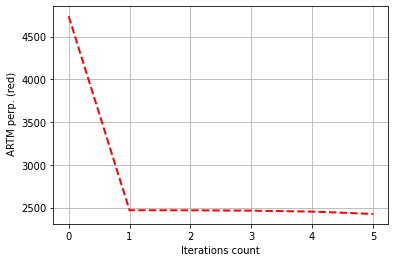

In [149]:
# посмотрим, что стало с моделью
# если график сильно падал на последних итерациях, то можно прогнать обучение ещё несколько раз 
# (не добавляя другие регуляризаторы)
print_measures(model_artm)

Добавим регуляризаторы разреженности тем и документов.

Их рекомендуется добавлять после того, как модель уже как-то сошлась. После добавления их рекомендуется постепенно уменьшать, чтобы усиливать разреживание. Их можно применять не ко всем темам, чтобы в каких-то темах собрались все стоп-слова.

Можно добавлять их вместе или по отдельности.

In [150]:
model_artm.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.15, 
                                                            topic_names=['topic_{}'.format(i) for i in range(1, 200)],
                                                            ))
model_artm.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.15, 
                                                              topic_names=['topic_{}'.format(i) for i in range(1, 200)]))

In [151]:
model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)

In [152]:
# будем постепенно увеличивать значения этих регуляризаторов
phi_tau = model_artm.regularizers['SparsePhi'].tau
theta_tau = model_artm.regularizers['SparseTheta'].tau

for i in range(10):
    model_artm.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*0.5))
    model_artm.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.1))
    
    model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)
    

Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.305 (ARTM)
Kernel contrast: 0.023 (ARTM)
Kernel purity: 0.040 (ARTM)
Perplexity: 1547.497 (ARTM)


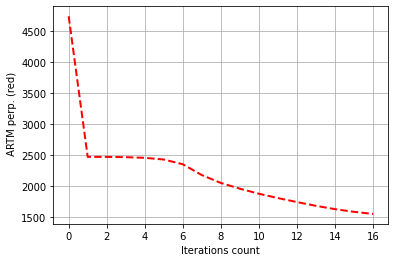

In [153]:
# посмотрим на качество
print_measures(model_artm)

Перплексия должна снижаться. Если график выровнился и больше не меняется - модель сошлась. Обычно перплексия хорошей модели около 200-1000. На таком небольшом количестве данных возможно такого значения достичь не получится.

In [154]:
# посмотрим на темы
for topic_name in model_artm.topic_names[:50]:
    print(topic_name + ': ')
    try:
        for x in model_artm.score_tracker['TopTokensScore_1'].last_tokens[topic_name]:
            print(x)
        print('---------')
    
    except KeyError: # можно перекрутить параметры и некоторые темы окажутся пустыми
        continue

topic_0: 
лекция
лекции
курса
слайды
основы
лекций
курс
узнаете
состоится
приглашаем
---------
topic_1: 
помещения
коррекции
музыки
отверстия
диагностики
оценки
трекер
работ
соревнований
железа
---------
topic_2: 
помещения
коррекции
музыки
отверстия
диагностики
оценки
трекер
работ
соревнований
помещение
---------
topic_3: 
помещения
коррекции
музыки
отверстия
диагностики
оценки
трекер
работ
соревнований
железа
---------
topic_4: 
помещения
коррекции
музыки
отверстия
диагностики
оценки
трекер
работ
соревнований
железа
---------
topic_5: 
помещения
коррекции
музыки
отверстия
диагностики
оценки
трекер
работ
соревнований
железа
---------
topic_6: 
помещения
коррекции
музыки
отверстия
диагностики
оценки
трекер
работ
соревнований
железа
---------
topic_7: 
помещения
коррекции
музыки
отверстия
диагностики
оценки
трекер
работ
соревнований
помещение
---------
topic_8: 
помещения
коррекции
музыки
отверстия
диагностики
оценки
работ
трекер
соревнований
помещение
---------
topic_9: 
помещения
корр

In [ ]:
рублей
млн
ноября
компании
скидка
рф
года
месяц
ооо
акции


помещения
коррекции
музыки
отверстия
диагностики
оценки
трекер
работ
соревнований
железа

ибп
двойным
преобразованием
бесперебойного
электросети
стабилизация
напряжения
кпд
электропитания
батарей


Первый прогон с данными параметрами:

количество тем 200
что стало с моделью
Perplexity: 2031.236 (ARTM)
качество
Perplexity: 1371.334 (ARTM)


Второй прогон

tau = 0.75
tau = 0.25
что стало с моделью
Perplexity: 2113.427 (ARTM)
качество
Perplexity: 1736.736 (ARTM)
помощью
данные
системы
позволяет
нам
необходимо
работает
сети
использовать
данных

помощью
нам
код
позволяет
необходимо
всё
случае
является

третий проход
tau = 0.10
tau = 0.5
количество 100
модель
Perplexity: 2113.458 (ARTM)
качество
Perplexity: 1970.926 (ARTM)
компании
–
году
будут
сети
является
образом
проекта
каждый
безопасности